In [18]:
import pandas as pd
import numpy as np
import sklearn



In [19]:
df_red = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
df_white = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

If your internet connection is slow, you can directly read from the local files. Uncomment (remove #) before you execute.

In [20]:
df_red = pd.read_csv('winequality-red.csv', sep=";")
df_white = pd.read_csv('winequality-red.csv', sep=";")

In [21]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Assing input (X) and output (y)

In [22]:
y = (df_red['quality'].values > 6)
X = df_red.iloc[:,0:-1]

Split training set and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Normalize X data (on training set)

In [24]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1119.0,-1.271945e-16,1.000447,-2.090941,-0.712549,-0.253085,0.550977,4.341555
1,1119.0,-1.214399e-16,1.000447,-2.214153,-0.757544,-0.056214,0.591167,5.662322
2,1119.0,-2.622765e-16,1.000447,-1.396757,-0.934734,-0.062025,0.759348,3.736827
3,1119.0,2.115277e-16,1.000447,-1.108115,-0.438669,-0.237836,0.029943,8.665794
4,1119.0,-1.587450e-18,1.000447,-1.527181,-0.356857,-0.175255,0.046703,10.559442
5,1119.0,1.438627e-16,1.000447,-1.419711,-0.767974,-0.209341,0.535501,5.190770
6,1119.0,1.230274e-17,1.000447,-1.210217,-0.743039,-0.275861,0.454105,7.052999
7,1119.0,-5.975193e-14,1.000447,-3.520329,-0.608117,-0.018302,0.582045,3.652243
8,1119.0,1.005551e-15,1.000447,-3.669365,-0.638236,0.006686,0.587115,4.521134
9,1119.0,-3.551920e-17,1.000447,-1.626274,-0.618757,-0.226944,0.388761,7.497358


In [25]:
pd.DataFrame(X_test_std).describe().transpose() ##to see whether the standardscaler are correct or not

,count,mean,std,min,25%,50%,75%,max
0,480.0,-0.040224,0.999312,-2.148374,-0.712549,-0.253085,0.450469,4.169256
1,480.0,-0.046717,0.880606,-1.998359,-0.757544,-0.056214,0.564193,2.749105
2,480.0,-0.018924,0.999968,-1.396757,-0.934734,-0.113361,0.810684,2.658775
3,480.0,-0.036723,0.796904,-0.907282,-0.438669,-0.237836,0.029943,6.925235
4,480.0,-0.014713,0.820105,-1.083265,-0.336679,-0.165166,0.046703,6.745800
5,480.0,-0.115848,0.904818,-1.419711,-0.861079,-0.302447,0.442396,3.328663
6,480.0,-0.095316,0.857481,-1.210217,-0.772238,-0.305059,0.366510,3.432367
7,480.0,-0.014166,0.979460,-3.451868,-0.629182,0.023827,0.550448,3.394199
8,480.0,0.046187,0.984725,-2.766476,-0.638236,0.071178,0.587115,3.811720
9,480.0,-0.044681,0.815862,-1.850167,-0.562783,-0.226944,0.388761,3.803127


In [31]:
y_train0=np.where(y_train,1,-1)
y_test0=np.where(y_test,1,-1)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
import numpy as np
cov_mat=np.cov(X_train.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eigen_vals)


Eigenvalues 
[  1.22866134e+03   6.10611629e+01   3.16240854e+00   1.95060182e+00
   1.05153989e+00   4.40959004e-02   2.54428609e-02   1.15533073e-02
   1.03853576e-02   1.59834545e-03   5.71976783e-07]


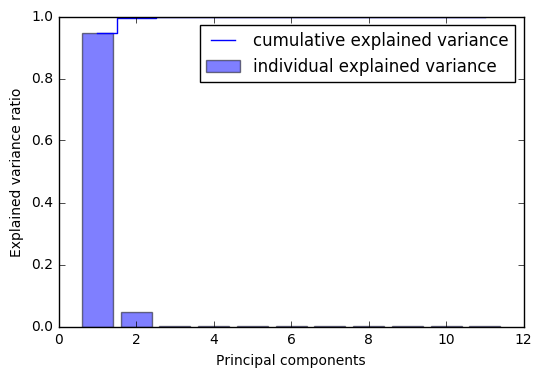

In [28]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,len(var_exp)+1),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [29]:
eigen_vecs[0]  ##from here we can see that
#the most import character is the third character(having the largest absolute value)

array([ 0.00614323, -0.02377867, -0.92378055, -0.3538459 ,  0.09838097,
        0.08049212,  0.0129109 ,  0.06434147, -0.01400819,  0.01256958,
       -0.00093792])

In [32]:
AccArr=np.zeros(11)
for i in np.arange(1,12):
    pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=i)),('clf',LogisticRegression(random_state=1))])
    pipe_lr.fit(X_train,y_train0)
    AccArr[i-1]=pipe_lr.score(X_test,y_test0)
    print('Test Accuracy for PCA %d LogisticReg: %.3f' %(i,AccArr[i-1]))    

Test Accuracy for PCA 1 LogisticReg: 0.896
Test Accuracy for PCA 2 LogisticReg: 0.892
Test Accuracy for PCA 3 LogisticReg: 0.894
Test Accuracy for PCA 4 LogisticReg: 0.892
Test Accuracy for PCA 5 LogisticReg: 0.894
Test Accuracy for PCA 6 LogisticReg: 0.890
Test Accuracy for PCA 7 LogisticReg: 0.892
Test Accuracy for PCA 8 LogisticReg: 0.892
Test Accuracy for PCA 9 LogisticReg: 0.900
Test Accuracy for PCA 10 LogisticReg: 0.902
Test Accuracy for PCA 11 LogisticReg: 0.898


In [34]:
AccArr=np.zeros(9)
for i in np.arange(2,10):
    pipe_lr=Pipeline([('scl',StandardScaler()),('clf',DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0))])
    pipe_lr.fit(X_train,y_train0)
    AccArr[i-1]=pipe_lr.score(X_test,y_test0)
    print('Test Accuracy for  DecisionTree depth%d without PCA : %.3f' %(i,AccArr[i-1]))    

Test Accuracy for  DecisionTree depth2 without PCA : 0.806
Test Accuracy for  DecisionTree depth3 without PCA : 0.848
Test Accuracy for  DecisionTree depth4 without PCA : 0.873
Test Accuracy for  DecisionTree depth5 without PCA : 0.873
Test Accuracy for  DecisionTree depth6 without PCA : 0.856
Test Accuracy for  DecisionTree depth7 without PCA : 0.871
Test Accuracy for  DecisionTree depth8 without PCA : 0.881
Test Accuracy for  DecisionTree depth9 without PCA : 0.875


In [39]:
pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0))])
pipe_lr.fit(X_train,y_train0)
print('Test Accuracy for  DecisionTree with PCA : %.3f' %(pipe_lr.score(X_test,y_test0)))    

Test Accuracy for  DecisionTree with PCA : 0.896


In [40]:
AccArr=np.zeros(11)
for i in np.arange(1,12):
    pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=i)),('clf',SVC(kernel='linear',C=1.0,random_state=0))])
    pipe_lr.fit(X_train,y_train0)
    AccArr[i-1]=pipe_lr.score(X_test,y_test0)
    print('Test Accuracy for PCA %d SVC: %.3f' %(i,AccArr[i-1]))   

Test Accuracy for PCA 1 SVC: 0.896
Test Accuracy for PCA 2 SVC: 0.896
Test Accuracy for PCA 3 SVC: 0.896
Test Accuracy for PCA 4 SVC: 0.896
Test Accuracy for PCA 5 SVC: 0.896
Test Accuracy for PCA 6 SVC: 0.896
Test Accuracy for PCA 7 SVC: 0.896
Test Accuracy for PCA 8 SVC: 0.896
Test Accuracy for PCA 9 SVC: 0.896
Test Accuracy for PCA 10 SVC: 0.902
Test Accuracy for PCA 11 SVC: 0.885
